# **Frequência e Medidas - Challenge**

Esse desafio tem como objetivo responder algumas perguntas através da análise de dados, aprofundando o conhecimento em frequência e medidas.

Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link: https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais. 

Variáveis:
*   ***gender*** - gênero do aluno
*   ***race/ethnicity*** - raça/etnia dos alunos
*   ***parental level of education*** - grau de escolaridade dos pais
*   ***lunch*** - tipo de almoço
*   ***test preparation course*** - indica se fez curso preparatório
*   ***math score*** - nota na prova de matematica
*   ***reading score*** - nota na prova de leitura
*   ***writing score*** - nota na prova de escrita

Os dados são arquivos em .csv.

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Fazendo a leitura e uma análise inicial da base de dados.

In [114]:
# verificando as primeiras linhas da base de dados
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [115]:
# Verificando o tamanho da base de dados
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 1000 linhas e 8 colunas.


In [116]:
# verificando o tipo de variaveis
df.info()
# OBS: nesse caso não será necessário modificar o tipo de nenhuma variável, pois todas estão no formato esperado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [117]:
# trocando os espaços e "/" por "_" no nome das colunas para adotar o padrão snake case de nomenclatura
df.columns = df.columns.str.replace(" ", "_").str.replace("/","_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Idenfique as variáveis qualitativas e quantitativas.

qualitativas: gender; race_ethnicity; parental_level_of_education; lunch; test_preparation_course

quantitativas: math_score; reading_score; writing_score

### Analisando a quantidade de alunos em cada grupo racial/étnico.

In [118]:
grupo_a = df['race_ethnicity'].value_counts()['group A']
grupo_b = df['race_ethnicity'].value_counts()['group B']
grupo_c = df['race_ethnicity'].value_counts()['group C']
grupo_d = df['race_ethnicity'].value_counts()['group D']
grupo_e = df['race_ethnicity'].value_counts()['group E']

print(f'Quantidade de alunos por grupo racial/étnico\nGrupo A: {grupo_a}\nGrupo B: {grupo_b}\nGrupo C: {grupo_c}\nGrupo D: {grupo_d}\nGrupo E: {grupo_e}')

Quantidade de alunos por grupo racial/étnico
Grupo A: 89
Grupo B: 190
Grupo C: 319
Grupo D: 262
Grupo E: 140


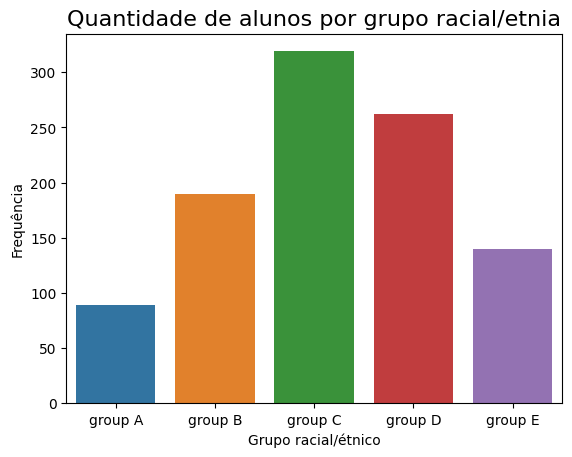

In [119]:
# criando um dataframe onde a raça/etnia é uma coluna
df_race = pd.crosstab(df["race_ethnicity"], "count" ).reset_index()
df_race
# criando gráfico da quantidade de alunos por grupo racial
sns.barplot(x = "race_ethnicity", y = "count", data = df_race)
plt.xlabel("Grupo racial/étnico")
plt.ylabel("Frequência")
plt.title("Quantidade de alunos por grupo racial/etnia", fontsize = 16)
plt.show()

### Analisando a quantidade de alunos de cada gênero.

In [120]:
genero = df.gender.value_counts()
print(f'A quantidade de mulheres no dataset é de {genero[0]} e de homens é de {genero[1]}.')

if genero[0] > genero[1]:
    print("Há mais alunos do gênero feminino.")
else:
    print("Há mais alunos do gênero masculino.")

A quantidade de mulheres no dataset é de 518 e de homens é de 482.
Há mais alunos do gênero feminino.


### Analisando as notas de matemática dos alunos.

In [121]:
# summarização da nota de matemática
df['math_score'].describe().round(2)

count    1000.00
mean       66.09
std        15.16
min         0.00
25%        57.00
50%        66.00
75%        77.00
max       100.00
Name: math_score, dtype: float64

Text(0, 0.5, 'Frequência')

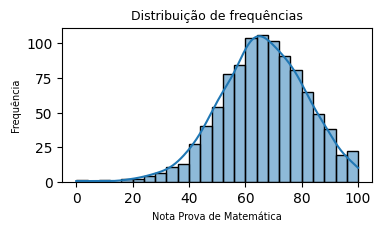

In [122]:
# Análise gráfica através de um histograma
ax = sns.histplot(df['math_score'], kde=True)
ax.figure.set_size_inches(4,2)
ax.set_title('Distribuição de frequências', fontsize=9)
ax.set_xlabel('Nota Prova de Matemática', fontsize=7)
ax.set_ylabel("Frequência", fontsize=7)

Notas de matemática estão concentradas em torno de 70 e a distribuição é assimétrica a esquerda

### Análise da nota média de matemática dos alunos segundo o gênero e raça/etnia.

Text(0, 0.5, 'Gênero')

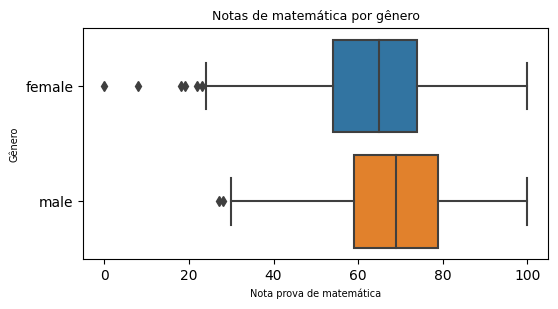

In [123]:
boxplot_matematica_genero = sns.boxplot(x= 'math_score', data = df, y = 'gender', orient='h')
boxplot_matematica_genero.figure.set_size_inches(6,3)
boxplot_matematica_genero.set_title('Notas de matemática por gênero', fontsize=9)
boxplot_matematica_genero.set_xlabel('Nota prova de matemática', fontsize=7)
boxplot_matematica_genero.set_ylabel("Gênero", fontsize=7)


Os alunos do sexo masculino possuem notas mais altas. 

Além disso, notas muito baixas (menor que 30 para homens e 25 para mulheres) são pouco frequentes e há indício que podem ser consideradas como outliers.

Text(0, 0.5, 'Raça/Etnia')

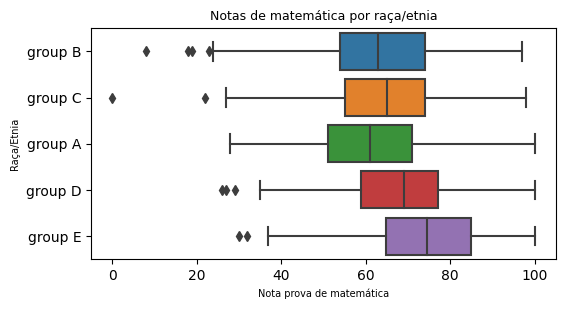

In [124]:
boxplot_matematica_raca = sns.boxplot(x= 'math_score', data = df, y = 'race_ethnicity', orient='h')
boxplot_matematica_raca.figure.set_size_inches(6,3)
boxplot_matematica_raca.set_title('Notas de matemática por raça/etnia', fontsize=9)
boxplot_matematica_raca.set_xlabel('Nota prova de matemática', fontsize=7)
boxplot_matematica_raca.set_ylabel("Raça/Etnia", fontsize=7)


Observa-se que as maiores notas são do grupo E, enquanto as menores são do grupo A.

### Análise gráfica das notas de matemática, escrita e leitura entre si.

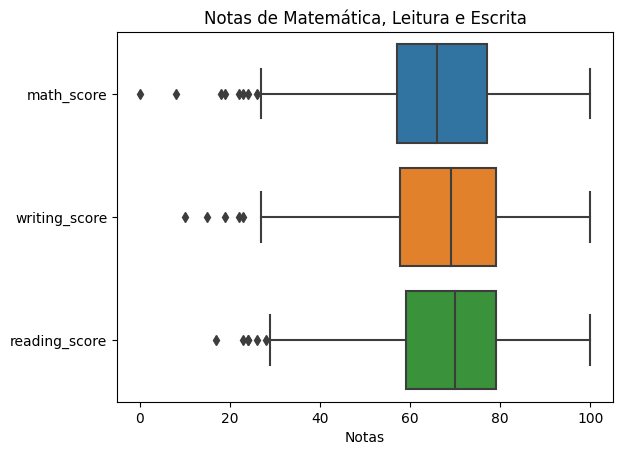

In [125]:
sns.boxplot(data = df[['math_score', 'writing_score', 'reading_score']], orient = 'h')
plt.title('Notas de Matemática, Leitura e Escrita')
plt.xlabel('Notas')
plt.show()

### Análise da nota média de matemática, escrita e leitura dos alunos segundo o grau de escolaridade dos pais.

(60.0, 80.0)

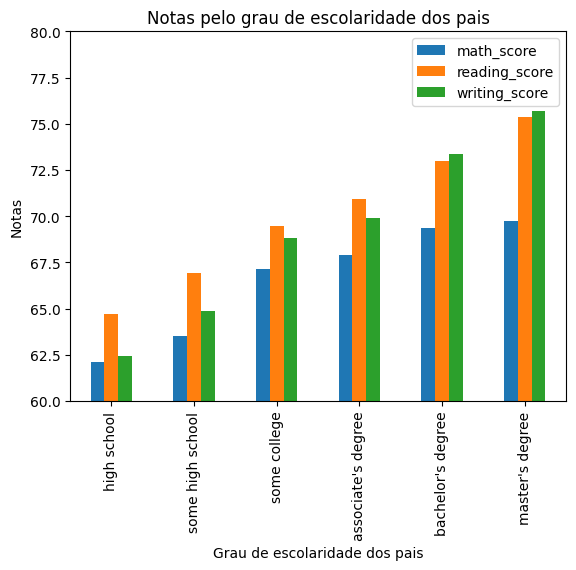

In [126]:
media_notas_escolaridade = df.groupby(df['parental_level_of_education'])[['math_score', 'reading_score', 'writing_score']].mean().round(2)
media_notas_escolaridade = media_notas_escolaridade.sort_values(by='math_score', ascending=True)

ax_notas_escolaridade = media_notas_escolaridade.plot(kind='bar')
ax_notas_escolaridade.set_title("Notas pelo grau de escolaridade dos pais")
ax_notas_escolaridade.set_xlabel("Grau de escolaridade dos pais")
ax_notas_escolaridade.set_ylabel('Notas')
ax_notas_escolaridade.set_ylim(60, 80)


### Análise gráfica das notas de acordo com a realização de curso preparatório.

(50.0, 80.0)

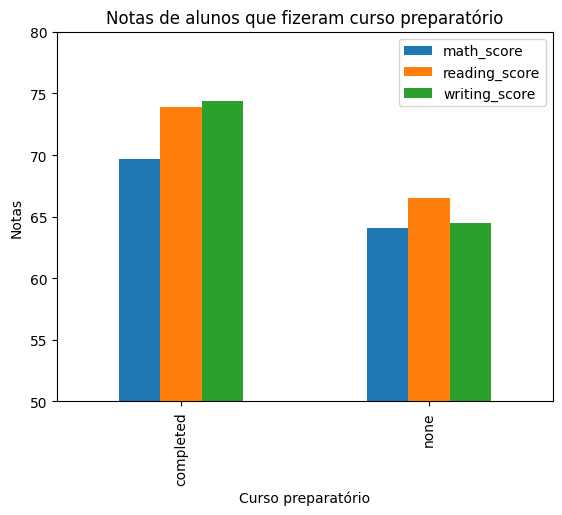

In [127]:
media_math_reading_writing = df.groupby(df['test_preparation_course'])[['math_score', 'reading_score', 'writing_score']].mean().round(2)

ax_scores_test_preparation = media_math_reading_writing.plot(kind='bar')
ax_scores_test_preparation.set_title('Notas de alunos que fizeram curso preparatório')
ax_scores_test_preparation.set_xlabel('Curso preparatório')
ax_scores_test_preparation.set_ylabel('Notas')
ax_scores_test_preparation.set_ylim(50, 80)


Observa-se que as notas de alunos que completaram cursos preparatórios possuem médias mais altas.

### Análise das notas médias de matemática, escrita e leitura dos alunos segundo o tipo do almoço dos alunos.

Text(0, 0.5, 'Tipo do almoço')

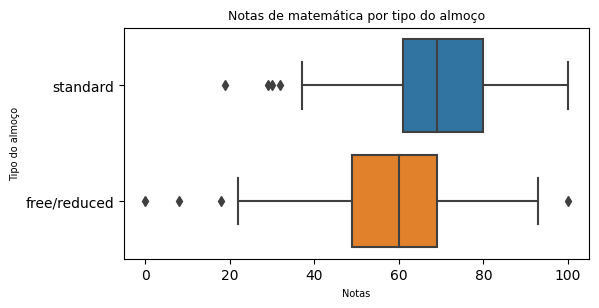

In [128]:
boxplot_notas_almoco = sns.boxplot(x= 'math_score', data = df, y = 'lunch', orient='h')
boxplot_notas_almoco.figure.set_size_inches(6,3)
boxplot_notas_almoco.set_title('Notas de matemática por tipo do almoço', fontsize=9)
boxplot_notas_almoco.set_xlabel('Notas', fontsize=7)
boxplot_notas_almoco.set_ylabel("Tipo do almoço", fontsize=7)

Text(0, 0.5, 'Tipo do almoço')

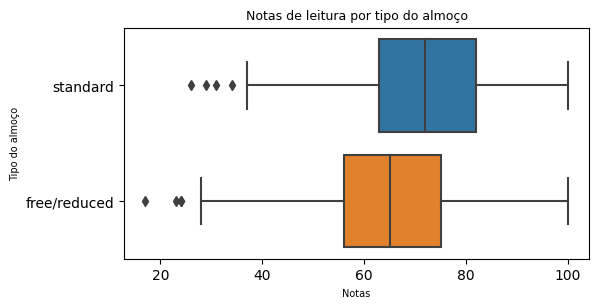

In [129]:
boxplot_notas_almoco = sns.boxplot(x= 'reading_score', data = df, y = 'lunch', orient='h')
boxplot_notas_almoco.figure.set_size_inches(6,3)
boxplot_notas_almoco.set_title('Notas de leitura por tipo do almoço', fontsize=9)
boxplot_notas_almoco.set_xlabel('Notas', fontsize=7)
boxplot_notas_almoco.set_ylabel("Tipo do almoço", fontsize=7)

Text(0, 0.5, 'Tipo do almoço')

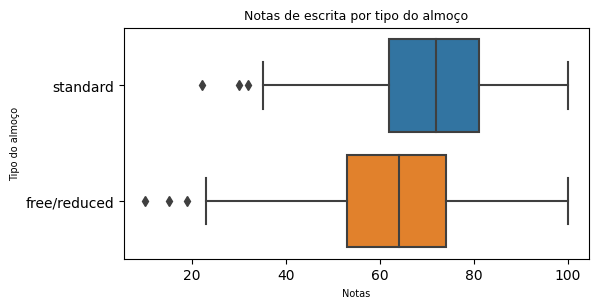

In [130]:
boxplot_notas_almoco = sns.boxplot(x= 'writing_score', data = df, y = 'lunch', orient='h')
boxplot_notas_almoco.figure.set_size_inches(6,3)
boxplot_notas_almoco.set_title('Notas de escrita por tipo do almoço', fontsize=9)
boxplot_notas_almoco.set_xlabel('Notas', fontsize=7)
boxplot_notas_almoco.set_ylabel("Tipo do almoço", fontsize=7)

(40.0, 80.0)

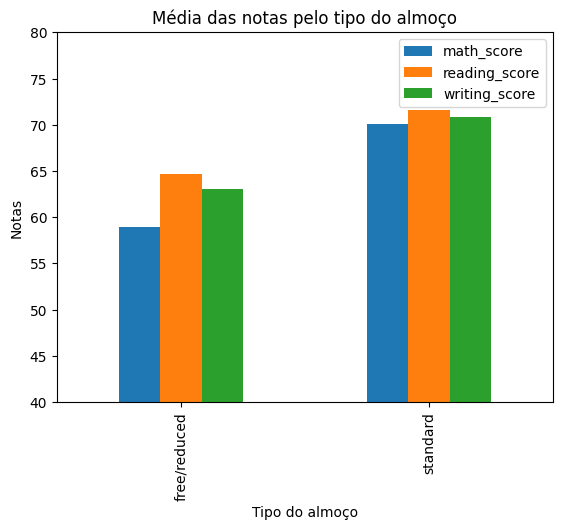

In [131]:
media_notas_almoco = df.groupby(df['lunch'])[['math_score', 'reading_score', 'writing_score']].mean().round(2)
media_notas_almoco = media_notas_almoco.sort_values(by='math_score', ascending=True)

ax_notas_almoco = media_notas_almoco.plot(kind='bar')
ax_notas_almoco.set_title("Média das notas pelo tipo do almoço")
ax_notas_almoco.set_xlabel("Tipo do almoço")
ax_notas_almoco.set_ylabel('Notas')
ax_notas_almoco.set_ylim(40, 80)


Conclui-se que os alunos que fazem parte do programa de almoço grátis ou num valor reduzido possuem menores notas.

### Gráficos de dispersão comparativos entre as variáveis de nota, segregado pelo gênero.

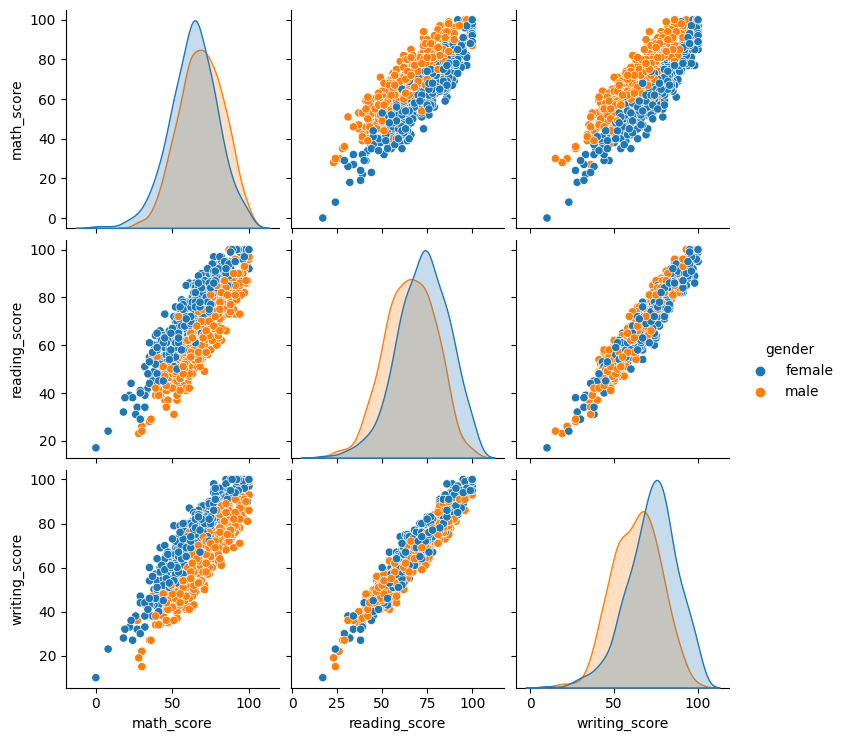

In [133]:
sns.pairplot( df[["math_score", "reading_score", "writing_score", "gender"]], hue = "gender" )

### Conclusão

Através das análises realizadas, foi observado que:

* As variáveis de grau de escolaridade dos pais e a realização de curso preparatório contribuem para um aumento nas notas de matemática, escrita e leitura;

* Alunos do sexo masculino possuem maiores notas de matemática, porém os do sexo feminino possuem as maiores notas de escrita e leitura;

* Notas de escrita e leitura no geral são mais altas que as notas de matemática;

* Os alunos que possuem acesso ao programa de almoço grátis/valor reduzido possuem notas menores nas três disciplinas quando comparado aos alunos que tem condições de pagar pelo almoço padrão.

Além disso, seria interessante alterar a forma de coleta de dados, de modo que fosse possível identificar quais são as raças/etnias e assim obter uma melhor análise da influência da raça nas notas.

